## Electricity Demand Forecasting – Notebook 1
## Data Understanding & Exploratory Data Analysis (EDA)

### Objective:
This notebook focuses on understanding the dataset, checking data quality,
and performing exploratory data analysis (EDA) to identify trends, seasonality,
and relationships between electricity demand and external factors such as
temperature, rainfall, and holidays.

## Step 1 : Import Required Libreries

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import math
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2 : Load the Dataset

In [2]:
ts=pd.read_csv(r"C:\Users\Chinnarajan M\OneDrive\Documents\Chinna projects\time_series_with_external_factors.csv")

In [3]:
# Display first 5 rows
ts.head()

,date,electricity_demand,temperature_celsius,rainfall_mm,is_holiday
0,1/1/2019,414.34,26.17,1.85,0
1,1/2/2019,399.36,25.07,12.70,0
2,1/3/2019,391.19,26.81,8.28,0
3,1/4/2019,433.55,28.73,5.96,0
4,1/5/2019,428.43,25.39,2.98,1


## Step 3 : Dataset Structure & Information

In [4]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 1826 non-null   object 
 1   electricity_demand   1826 non-null   float64
 2   temperature_celsius  1826 non-null   float64
 3   rainfall_mm          1826 non-null   float64
 4   is_holiday           1826 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 71.5+ KB


## Step 4 : Convert Data Column to DateTime

In [6]:
ts['date']=pd.to_datetime(ts['date'])
ts=ts.set_index('date')

In [7]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2019-01-01 to 2023-12-31
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   electricity_demand   1826 non-null   float64
 1   temperature_celsius  1826 non-null   float64
 2   rainfall_mm          1826 non-null   float64
 3   is_holiday           1826 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 71.3 KB


In [8]:
ts.head()

,electricity_demand,temperature_celsius,rainfall_mm,is_holiday
date,,,,
2019-01-01,414.34,26.17,1.85,0
2019-01-02,399.36,25.07,12.70,0
2019-01-03,391.19,26.81,8.28,0
2019-01-04,433.55,28.73,5.96,0
2019-01-05,428.43,25.39,2.98,1


## Step 5 : Check Missing Values

In [9]:
ts.isnull().sum()

electricity_demand     0
temperature_celsius    0
rainfall_mm            0
is_holiday             0
dtype: int64

In [ ]:
# No missing values ( dataset is clean )

## Step 6 : Summary Statistics

In [10]:
ts.describe()

,electricity_demand,temperature_celsius,rainfall_mm,is_holiday
count,1826.000000,1826.000000,1826.000000,1826.000000
mean,418.069710,25.086982,6.064096,0.285871
std,42.011519,7.309173,4.254034,0.451952
min,304.170000,8.690000,0.080000,0.000000
25%,385.167500,18.492500,2.990000,0.000000
50%,418.755000,25.170000,5.150000,0.000000
75%,451.045000,31.665000,8.060000,1.000000
max,524.400000,40.400000,40.830000,1.000000


## Step 7 : Electricity Demand Over Time

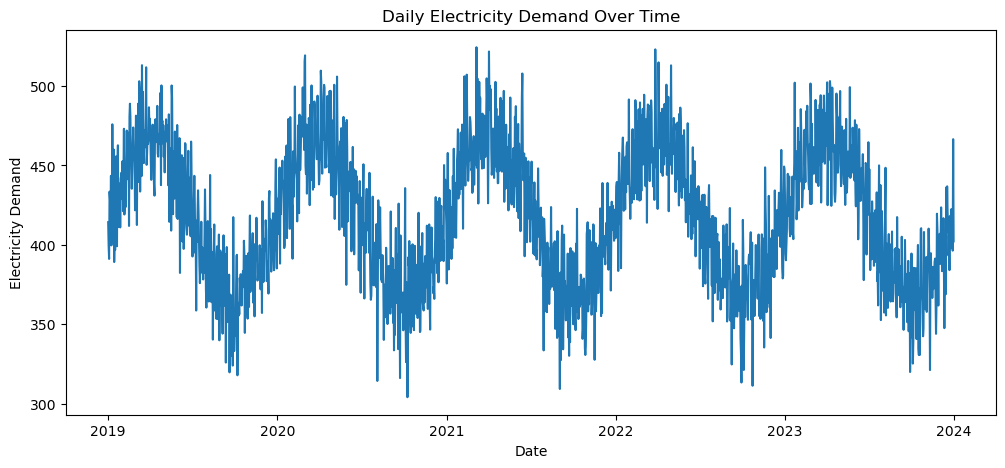

In [11]:
plt.figure(figsize=(12,5))
plt.plot(ts.index, ts['electricity_demand'])
plt.title("Daily Electricity Demand Over Time")
plt.xlabel("Date")
plt.ylabel("Electricity Demand")
plt.show()

## Step 8 : External Factors Visualization

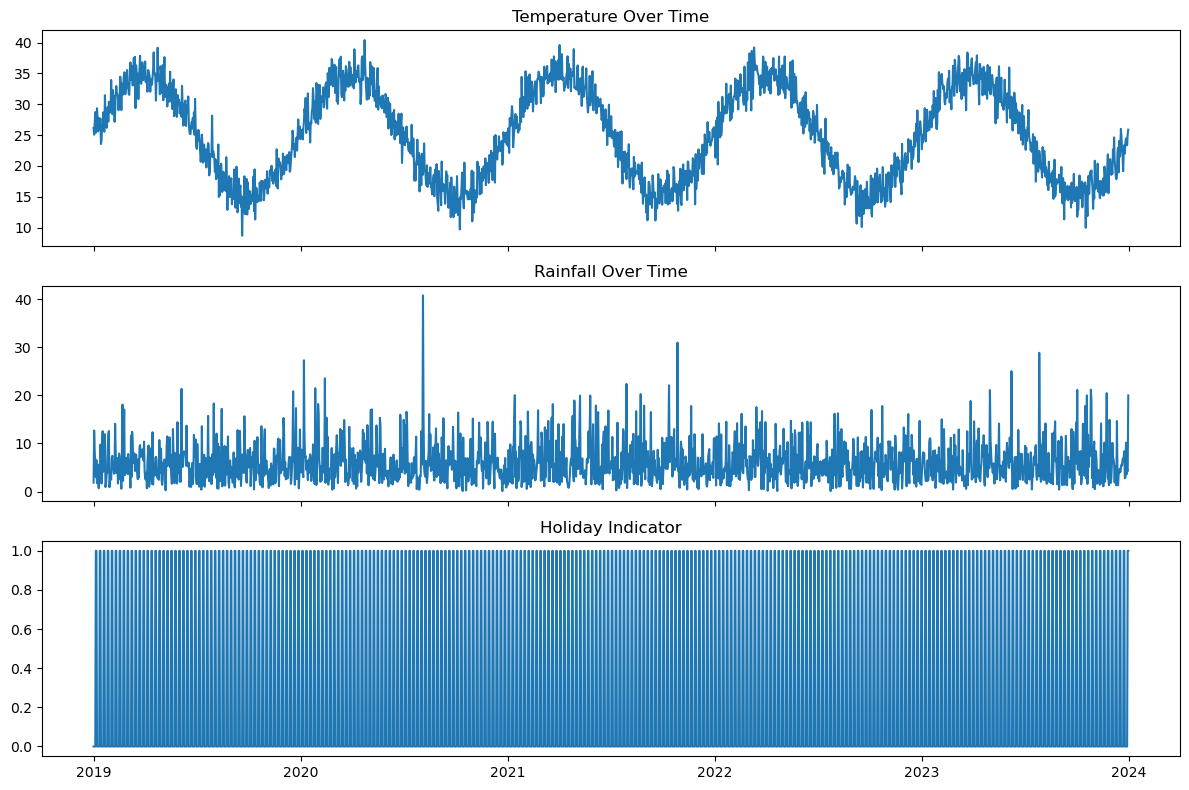

In [12]:
fig, axes = plt.subplots(3, 1, figsize=(12,8), sharex=True)

axes[0].plot(ts.index, ts['temperature_celsius'])
axes[0].set_title("Temperature Over Time")

axes[1].plot(ts.index, ts['rainfall_mm'])
axes[1].set_title("Rainfall Over Time")

axes[2].plot(ts.index, ts['is_holiday'])
axes[2].set_title("Holiday Indicator")

plt.tight_layout()
plt.show()

## Step 9 : Correlation Analysis

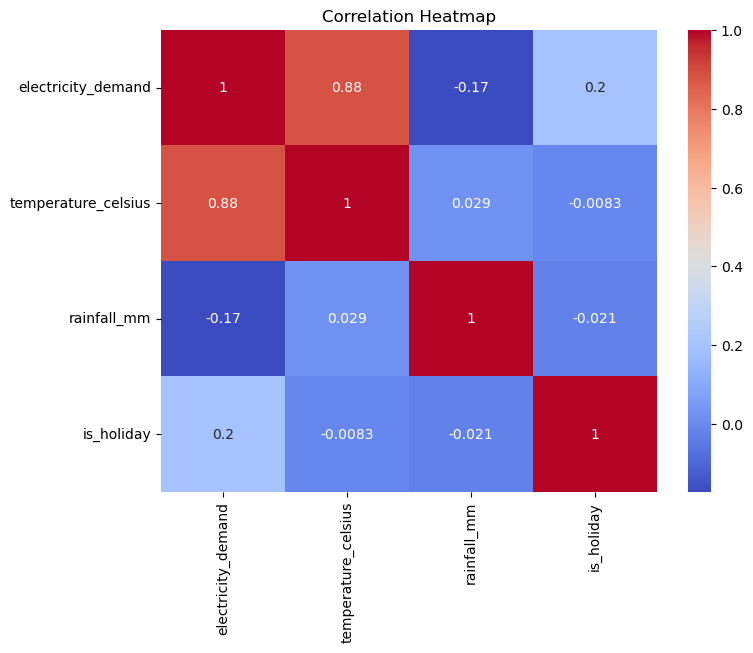

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(ts.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Key Observations from EDA

- Electricity demand shows clear seasonal patterns.
- Temperature has a strong positive influence on demand.
- Rainfall slightly reduces electricity usage.
- Demand increases during holidays/weekends.
- Dataset is clean and suitable for time series modeling with exogenous variables.